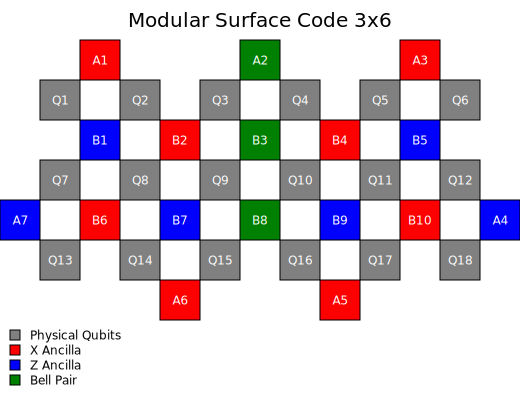

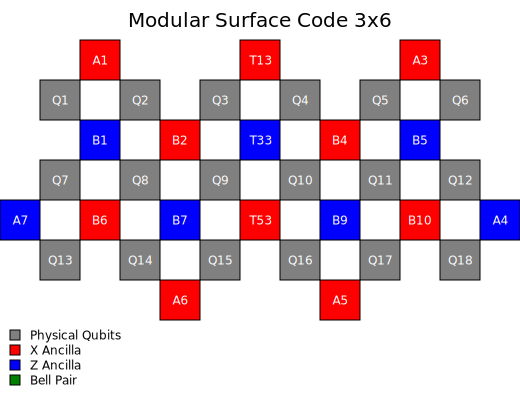

Z_ancillas are: [21, 333, 25, 27, 29, 17, 14]
Z_ancillas are: [21, 333, 25, 27, 29, 17, 14]
Z_ancillas are: [21, 333, 25, 27, 29, 17, 14]
Z_ancillas are: [21, 333, 25, 27, 29, 17, 14]
Z_ancillas are: [21, 333, 25, 27, 29, 17, 14]
Z_ancillas are: [21, 333, 25, 27, 29, 17, 14]
Z_ancillas are: [21, 333, 25, 27, 29, 17, 14]
Z_ancillas are: [21, 333, 25, 27, 29, 17, 14]
Z_ancillas are: [21, 333, 25, 27, 29, 17, 14]
Z_ancillas are: [21, 333, 25, 27, 29, 17, 14]
Z_ancillas are: [21, 333, 25, 27, 29, 17, 14]
Z_ancillas are: [21, 333, 25, 27, 29, 17, 14]
Z_ancillas are: [21, 333, 25, 27, 29, 17, 14]
Z_ancillas are: [21, 333, 25, 27, 29, 17, 14]
QUBIT_COORDS(0, 2) 11
QUBIT_COORDS(0, 6) 313
QUBIT_COORDS(0, 10) 13
QUBIT_COORDS(1, 1) 41
QUBIT_COORDS(1, 3) 42
QUBIT_COORDS(1, 5) 43
QUBIT_COORDS(1, 7) 44
QUBIT_COORDS(1, 9) 45
QUBIT_COORDS(1, 11) 46
QUBIT_COORDS(2, 2) 21
QUBIT_COORDS(2, 4) 22
QUBIT_COORDS(2, 6) 333
QUBIT_COORDS(2, 8) 24
QUBIT_COORDS(2, 10) 25
QUBIT_COORDS(3, 1) 47
QUBIT_COORDS(3, 3) 48

In [1]:
from Surface import surface_data 
from generate_circuit import generate_circuit
# Generate the data takes inputs(n,m,c,spacing,display_svg)    n,m dimensions c: cut position spacing&display_svg
data = surface_data(3, 6, 3, 0, display_svg=True)

circuit = generate_circuit(data, 0.01,0.1,2)
print(circuit)


LATEST UPDATE: Included Observable   
Switched Z and X roles   
TO DO: 1- When using Vecdec there seems to be an issue with circuit distance that I am still figuring it out   
(Compare to manual circuit -- 3*5 --> distance was 5)   
Also, PyMatching was unable to decode manual circuit


Distance Problem Fixed   
PyMatching Can Decode!   
Distance is still the longest dimension!   

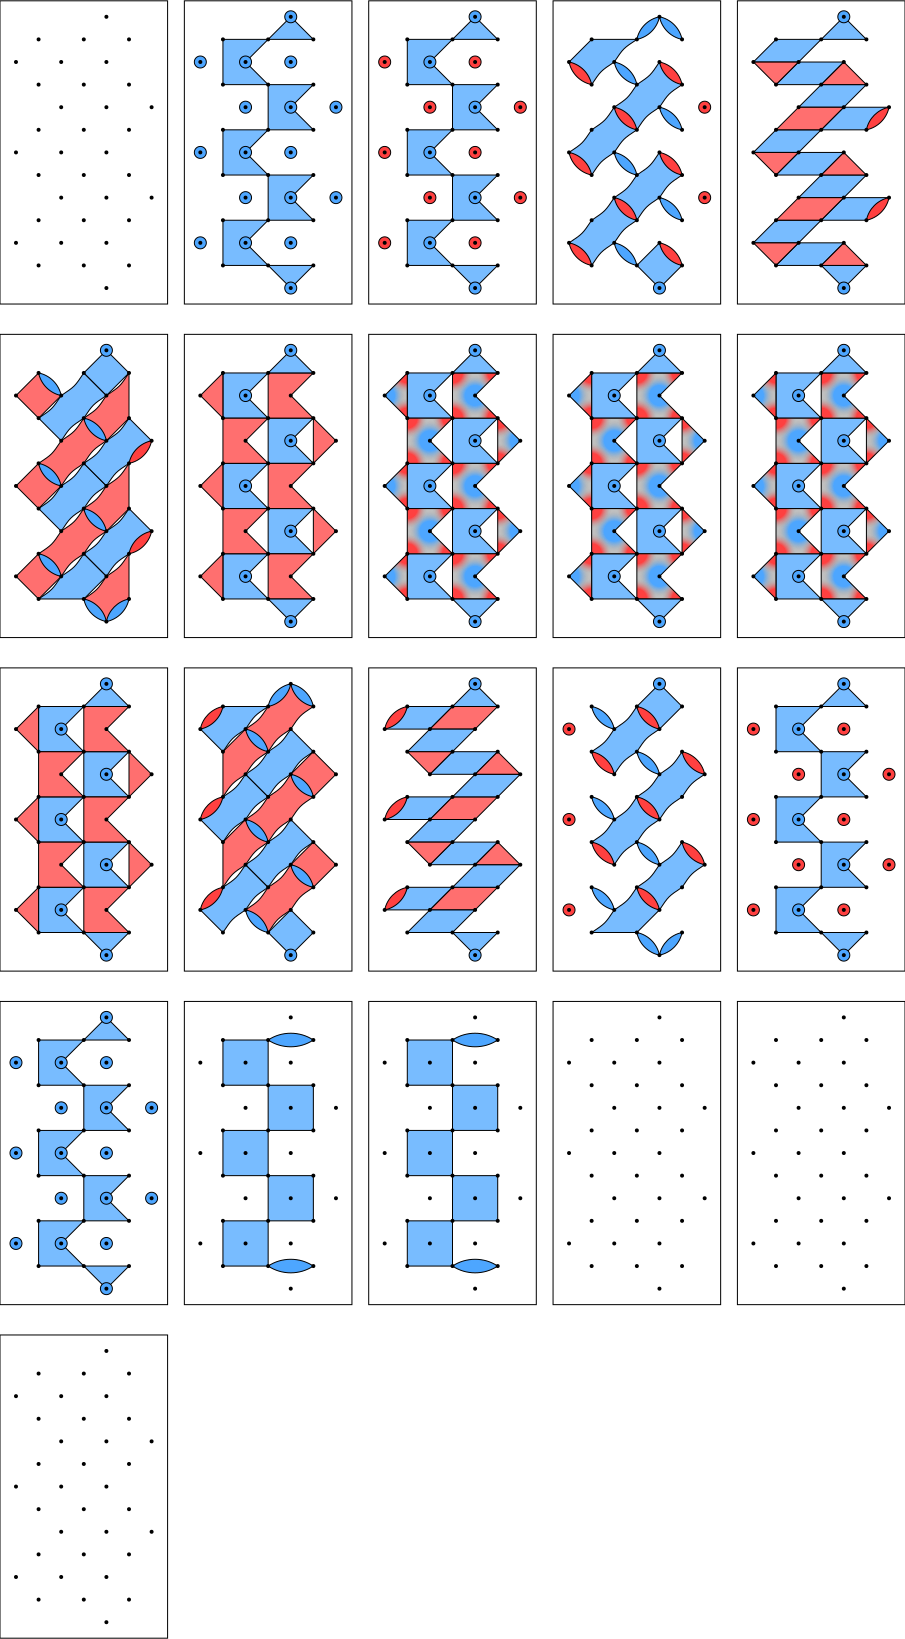

In [2]:
circuit.diagram('detslice-svg')

In [5]:
dem = circuit.detector_error_model()
print(dem)

error(0.02101172802650805) D0
error(0.009304831745666962) D0 D3
error(0.009304831745666962) D0 D5
error(0.01972584190227753) D0 D7
error(0.004005357180252828) D0 D7 D19
error(0.004005357180252828) D0 D12
error(0.001338700097173321) D0 D12 D19
error(0.00797862858822285) D0 D19
error(0.07838747744731503) D1
error(0.01192888888888882) D1 D3
error(0.005333333333333313) D1 D3 D14
error(0.03371952487640927) D1 D4
error(0.1692008213496453) D1 D8
error(0.00700025260754783) D1 D8 D14
error(0.02070810875176521) D1 D8 D14 D20
error(0.02070810875176521) D1 D8 D20
error(0.008320210227029227) D1 D10
error(0.008320210227029227) D1 D10 D14
error(0.00700025260754783) D1 D10 D14 D20
error(0.00700025260754783) D1 D10 D20
error(0.01520397568790284) D1 D14
error(0.02741843737473918) D1 D14 D20
error(0.05333333333333336) D1 D20
error(0.02101172802650805) D2
error(0.01192888888888882) D2 D4
error(0.005333333333333313) D2 D4 D15
error(0.009304831745666962) D2 D6
error(0.01908160489091348) D2 D9
error(0.000669

In [ ]:
from typing import List
import sinter 

# Generate the data
def my_circuit(n,noise,noise2):
    data = surface_data(n, 2*n, n, 3,display_svg=False)
    circuit = generate_circuit(data, noise,noise2,n)
    return circuit

noise2= 0.15

surface_code_tasks = [
    sinter.Task(
        circuit= my_circuit(d,noise,noise2),
        json_metadata={'d': d, 'r': d, 'p': noise},
    )
    for d in [3, 5, 7]
    for noise in [0.008, 0.009, 0.01, 0.011, 0.012,0.05]
]

collected_surface_code_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=surface_code_tasks,
    decoders=['pymatching'],
    max_shots=1_000_000,
    max_errors=5_000,
    print_progress=True,
)

Starting 4 workers...
18 cases left:
    pymatching processes=4  ~core_mins_left=1       shots_left=972800   errors_left=3988    {d=3,p=0.008,r=3}
    pymatching processes=0  ~core_mins_left=2       shots_left=999700   errors_left=4980    {d=3,p=0.009,r=3}
    pymatching processes=0  ~core_mins_left=2       shots_left=999700   errors_left=4981    {d=3,p=0.01,r=3}
    pymatching processes=0  ~core_mins_left=5       shots_left=999900   errors_left=4993    {d=3,p=0.011,r=3}
17 cases left:
    pymatching processes=3  ~core_mins_left=1       shots_left=943300   errors_left=2458    {d=3,p=0.009,r=3}
    pymatching processes=1  ~core_mins_left=1       shots_left=991900   errors_left=4559    {d=3,p=0.01,r=3}
    pymatching processes=0  ~core_mins_left=5       shots_left=999900   errors_left=4993    {d=3,p=0.011,r=3}
16 cases left:
    pymatching processes=1  ~core_mins_left=1       shots_left=950756   errors_left=2440    {d=3,p=0.01,r=3}
    pymatching processes=1  ~core_mins_left=1       shot

[sinter.TaskStats(strong_id='83b444fc3ef2206c165c7744e003f2e0ea8cee24679aaa12bd524f8dc6ea0398', decoder='pymatching', json_metadata={'d': 3, 'r': 3, 'p': 0.01}, shots=96727, errors=5000, seconds=2.4829999998910353), sinter.TaskStats(strong_id='5c4db0058830c80d137270aecd7346a39e91cc824dbe43fd3b56a96b3db4d6f6', decoder='pymatching', json_metadata={'d': 3, 'r': 3, 'p': 0.009}, shots=111551, errors=5095, seconds=2.8109999999869615), sinter.TaskStats(strong_id='7c3afc2d01716ef94da4ecee726f294497ee374a4d1b08e5d345dae578d48b42', decoder='pymatching', json_metadata={'d': 3, 'r': 3, 'p': 0.008}, shots=138026, errors=5001, seconds=3.1570000000065193), sinter.TaskStats(strong_id='98c985014832312ce7033f2c8fca7247b08395c0007847c845be67362b63e5d9', decoder='pymatching', json_metadata={'d': 3, 'r': 3, 'p': 0.011}, shots=78940, errors=5008, seconds=2.1110000000335276), sinter.TaskStats(strong_id='53f1c5b72bc5c3b6a6b297620f92aa8d4bfbe6625fae6c0e83dedcc6e31465ba', decoder='pymatching', json_metadata={'d

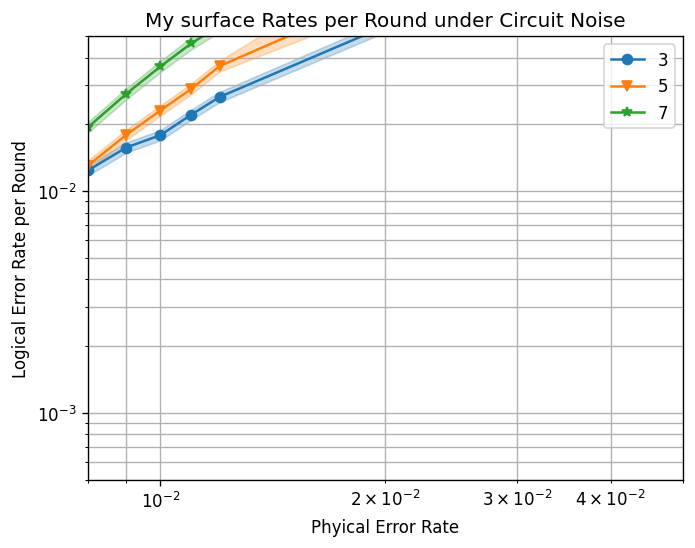

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_surface_code_stats,
    x_func=lambda stat: stat.json_metadata['p'],
    group_func=lambda stat: stat.json_metadata['d'],
    failure_units_per_shot_func=lambda stat: stat.json_metadata['r'],
)
ax.set_ylim(5e-4, 5e-2)
ax.set_xlim(0.008, 0.05)
ax.loglog()
ax.set_title("My surface Rates per Round under Circuit Noise")
ax.set_xlabel("Phyical Error Rate")
ax.set_ylabel("Logical Error Rate per Round")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)  # Show it bigger
print(collected_surface_code_stats)

In [ ]:
import stim
d=3
noise= 0.01
circuit = stim.Circuit.generated(
    "surface_code:rotated_memory_z",
    rounds=d * 3,
    distance=d,
    after_clifford_depolarization=noise,
    after_reset_flip_probability=noise,
    before_measure_flip_probability=noise,
    before_round_data_depolarization=noise,
),

print(circuit)

(stim.Circuit('''
    QUBIT_COORDS(1, 1) 1
    QUBIT_COORDS(2, 0) 2
    QUBIT_COORDS(3, 1) 3
    QUBIT_COORDS(5, 1) 5
    QUBIT_COORDS(1, 3) 8
    QUBIT_COORDS(2, 2) 9
    QUBIT_COORDS(3, 3) 10
    QUBIT_COORDS(4, 2) 11
    QUBIT_COORDS(5, 3) 12
    QUBIT_COORDS(6, 2) 13
    QUBIT_COORDS(0, 4) 14
    QUBIT_COORDS(1, 5) 15
    QUBIT_COORDS(2, 4) 16
    QUBIT_COORDS(3, 5) 17
    QUBIT_COORDS(4, 4) 18
    QUBIT_COORDS(5, 5) 19
    QUBIT_COORDS(4, 6) 25
    R 1 3 5 8 10 12 15 17 19
    X_ERROR(0.01) 1 3 5 8 10 12 15 17 19
    R 2 9 11 13 14 16 18 25
    X_ERROR(0.01) 2 9 11 13 14 16 18 25
    TICK
    DEPOLARIZE1(0.01) 1 3 5 8 10 12 15 17 19
    H 2 11 16 25
    DEPOLARIZE1(0.01) 2 11 16 25
    TICK
    CX 2 3 16 17 11 12 15 14 10 9 19 18
    DEPOLARIZE2(0.01) 2 3 16 17 11 12 15 14 10 9 19 18
    TICK
    CX 2 1 16 15 11 10 8 14 3 9 12 18
    DEPOLARIZE2(0.01) 2 1 16 15 11 10 8 14 3 9 12 18
    TICK
    CX 16 10 11 5 25 19 8 9 17 18 12 13
    DEPOLARIZE2(0.01) 16 10 11 5 25 19 8 9 17 18 12